In [1]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset mushroom.csv
df=pd.read_csv("mushroom.csv")

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.shape

(2000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
# Check missing values per column
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [7]:
df.duplicated().any()

np.True_

In [8]:
df[df.duplicated()]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,1279,bell,smooth,pink,no,foul,notched,distant,broad,pink,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,1275,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,549,conical,grooves,brown,no,foul,free,distant,broad,white,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,1198,sunken,smooth,white,no,anise,attached,crowded,broad,black,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,618,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,871,flat,scaly,pink,no,spicy,attached,distant,narrow,red,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().any()

np.False_

In [11]:
df.shape

(976, 26)

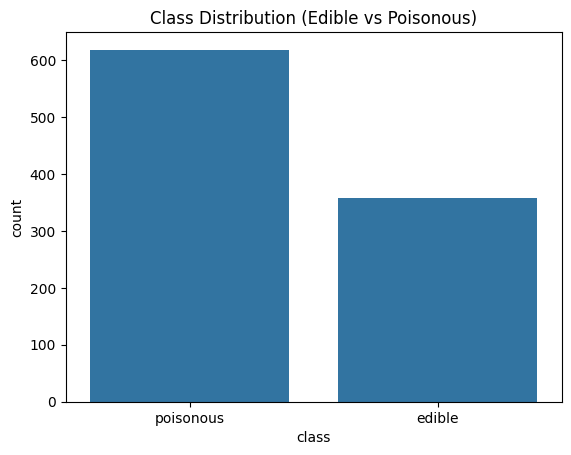

In [12]:
sns.countplot(x="class", data=df)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

In [13]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [27]:
X = df.drop("class", axis=1)
y = df["class"] # target = class

In [41]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['stalk_height', 'cap_diameter'], dtype='object')

In [42]:
cat_cols = X.select_dtypes(include=["object"]).columns
cat_cols

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [44]:
preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat",OneHotEncoder(handle_unknown="ignore",sparse_output=False),
         cat_cols)
,])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['stalk_height', 'cap_diameter'], dtype='object')),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object'))])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [47]:
X_test

array([[ 1.11672936,  0.31938975,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.19661758, -0.21321812,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63667833, -1.48107308,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.27421113, -1.14184429,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.57015474,  0.82148479,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.12754841,  0.76576262,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
X_train

array([[ 0.87917115,  0.6310602 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.26371594,  0.92358252,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31204917, -1.27379801,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.24075627,  0.70927297,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.74202302,  0.91491505,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.64816996, -1.56188355,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

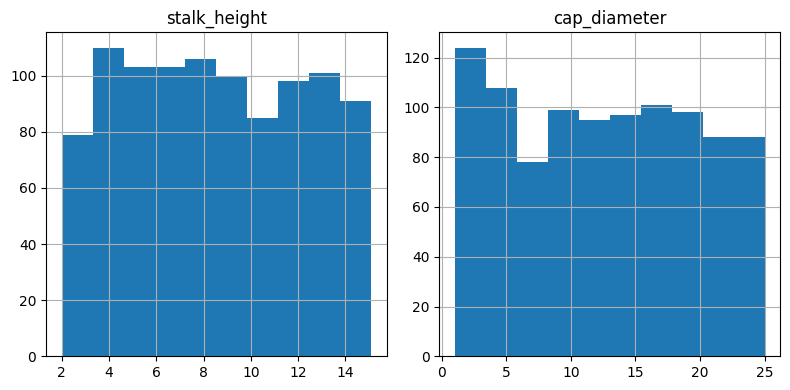

In [48]:
df[["stalk_height", "cap_diameter"]].hist(figsize=(8,4))
plt.tight_layout()
plt.show() # Numerical data plot

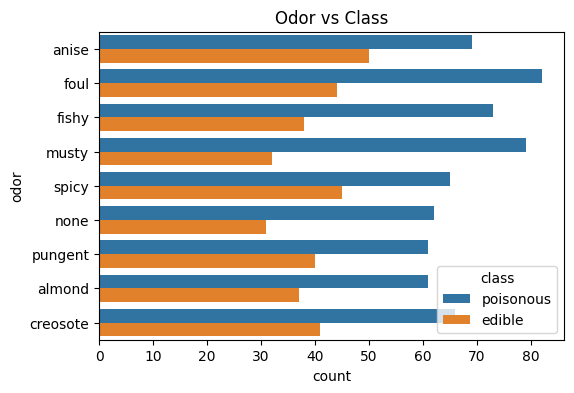

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(y="odor", hue="class", data=df)
plt.title("Odor vs Class")
plt.show() # categorical data plot

In [50]:
from sklearn.svm import SVC
from sklearn import svm
svm1=svm.SVC(kernel='linear',C=0.01)
svm1.fit(X_test,y_test)
SVC(C=0.01,kernel='linear')

# svm.SVC  is  importing SVC from svm
# kernel helps to convert low dimensionl to high dimensional

SVC(C=0.01, kernel='linear')

In [51]:
y_pred=svm1.predict(X_test)
y_pred

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'pois

In [52]:
y_pred1=svm1.predict(X_train)
y_pred1

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'pois

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[  0,  72],
       [  0, 124]])

In [54]:
cm=confusion_matrix(y_train,y_pred1)
cm

array([[  0, 286],
       [  0, 494]])

<Axes: >

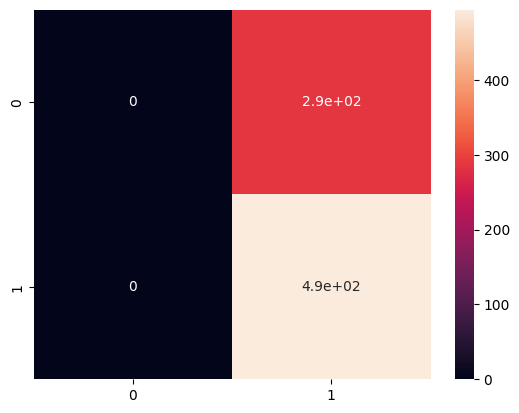

In [55]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00        72
   poisonous       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



In [57]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       286
   poisonous       0.63      1.00      0.78       494

    accuracy                           0.63       780
   macro avg       0.32      0.50      0.39       780
weighted avg       0.40      0.63      0.49       780



In [58]:
print(accuracy_score(y_test,y_pred))

0.6326530612244898


In [59]:
print(accuracy_score(y_train,y_pred1))

0.6333333333333333


In [64]:
from sklearn.model_selection import GridSearchCV
params={'C':range(1,10),'kernel':['linear','rbf','poly','sigmoid'],'gamma':[0.1,0.2,0.3,0.4,0.5]}

In [69]:
grid_search=GridSearchCV(cm,params)

''' grid = GridSearchCV(
    svm_model,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)'''

' grid = GridSearchCV(\n    svm_model,\n    param_grid,\n    cv=5,\n    scoring="accuracy",\n    n_jobs=-1\n)'

In [73]:
GridSearchCV(estimator=X_train, param_grid=...)

GridSearchCV(estimator=array([[ 0.87917115,  0.6310602 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.26371594,  0.92358252,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31204917, -1.27379801,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.24075627,  0.70927297,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.74202302,  0.91491505,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.64816996, -1.56188355,  0.        , ...,  0.        ,
         0.        ,  0.        ]]),
             param_grid=Ellipsis)